# Space Flight Mice Liver Gene Analysis
## Heat Propagation and Clustering Package
### Python 2 compatible version

----------------------

Author: Mikayla Webster (13webstermj@gmail.com)

Date: 2nd May, 2018

----------------------

<a id='toc'></a>
## Table of Contents
1. [Background](#background)
2. [Import packages](#import)
3. [Define Analysis Preferences](#pref)
3. [Load Networks](#load)
4. [Localization](#local)
4. [Run Heat Propagation](#heat)
5. [Clustering](#cluster)

## Background
<a id='background'></a>

The Heat2 module provides tools to conduct an integrated network analysis of a set of differentially expressed genes (DEGs). The set of DEGs analyzed in this notebook come from an experiment performed by NASA called the [Rodent Research Project on the ISS](https://genelab-data.ndc.nasa.gov/genelab/accession/GLDS-48). The tissues sampled for this experiment were taken from the livers of mice who experienced space flight. 

The focus of this notebook is to demonstrate how to load a background network from [NDEXbio](http://ndexbio.org/#/).

## Import packages
<a id='import'></a>

In [19]:
# uncomment if you have not pip-installed 

import sys
code_path = '../../network_bio_toolkit'
sys.path.append(code_path)

import Heat2
reload(Heat2)

import pandas as pd
import numpy as np

#from network_bio_toolkit import Heat2

## Define Analysis Preferences
<a id='pref'></a>

In [2]:
symbol_or_entrez='symbol'

species='mouse'


heat = Heat2.Heat(gene_type = symbol_or_entrez, species = species)

## Load Networks
<a id='load'></a>

1. Load DEG file 
2. Load STRING background network

In [3]:
# load DEG file
DEG_filename = "../../DEG_files/DE_CoeffspaceFlight - groundControl_glds48_20180312.csv"  
heat.create_DEG_list(DEG_filename, p_value_filter = 0.05, sep = ',')

print('Number of DEG\'s: ' + str(len(heat.DEG_list)))

Number of DEG's: 181


In [4]:
# load our saved network from ndex rather than loading it ourselves
# equivalent to heat.load_STRING_links('../../background_networks/10090.protein.links.v10.5.txt', confidence_filter = 700)
heat.load_ndex_from_server(UUID = '76160faa-5d0f-11e8-a4bf-0ac135e8bacf', relabel_node_field = 'name')




Number of interactions: 369294


In [10]:
print('\nNumber of nodes: ' + str(len(list(heat.DG_universe.nodes()))))
print('\nNumber of interactions: ' + str(len(list(heat.DG_universe.edges()))))


Number of nodes: 13442

Number of interactions: 369294


In [5]:
saved_DG_universe = heat.DG_universe
heat.DG_universe = saved_DG_universe

## Localization ##
<a id='local'></a>

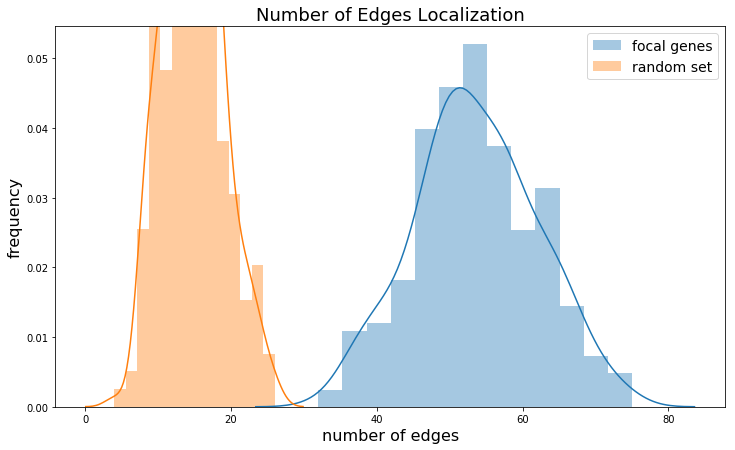

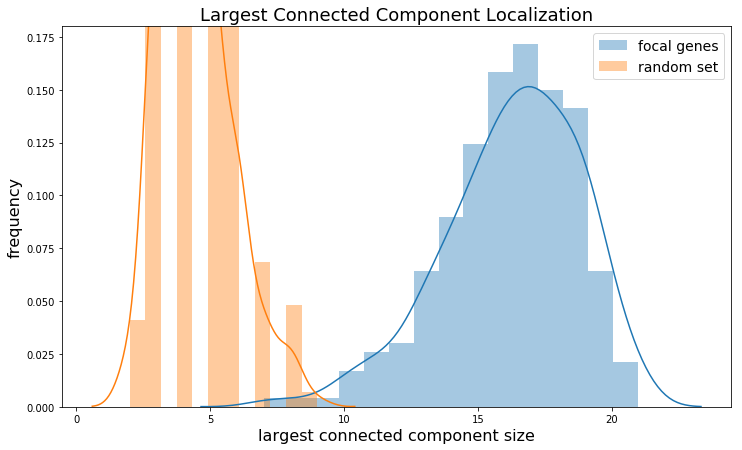

In [6]:
numedges_list, numedges_rand, LCC_list, LCC_rand = heat.localization(num_reps = 250, 
                                                                     sample_frac = 0.8, 
                                                                     method = 'both', 
                                                                     plot = True)

1.3322676295501878e-15


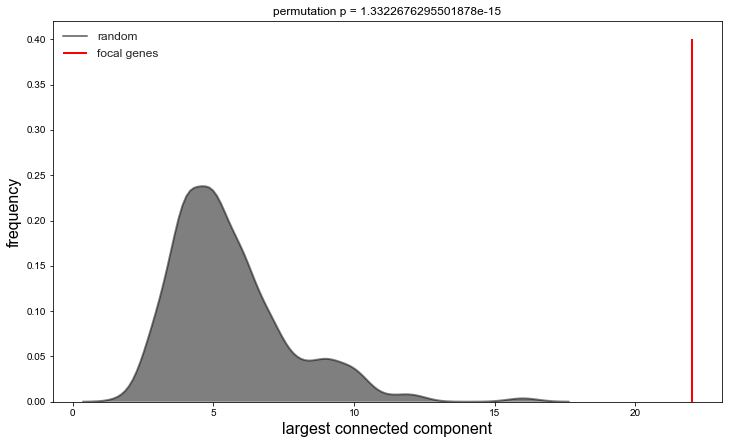

In [7]:
# test out plotting parameters with a smaller num_reps first.
numedges_list, numedges_rand, LCC_list, LCC_rand = heat.localization_full(num_reps = 200, 
                                                                          method = 'LCC', 
                                                                          label = 'focal genes',
                                                                          line_height = 0.4,
                                                                          legend_loc = 'upper left')

## Run Heat Propagation
<a id='heat'></a>

In [8]:
Wprime = heat.normalized_adj_matrix() # optional. Saves time to do it once here.

In [11]:
saved_Wprime = heat.Wprime
heat.Wprime = saved_Wprime

In [13]:
heat.draw_heat_prop(num_nodes = 300,
                  edge_width = 2,
                  edge_smooth_enabled = True,
                  edge_smooth_type = 'bezier',
                  node_size_multiplier = 5,
                  hover = False,
                  hover_connected_edges = False,
                  largest_connected_component = True,
                  physics_enabled = True,
                  node_font_size = 40,
                  graph_id = 1,
                  node_shadow_x = 6)

## Clustering 
<a id='cluster'></a>

Parameter information:
- **G_DEG**: background network filtered by DEG list, output of load_STRING_to_digraph
- **DG_universe**: full background network, output of create_graph.load_STRING_to_digraph 
- **seed_nodes**: list of DEG's, output of create_graph.create_DEG_list
- **Wprime**: will calculate automatically of not specified, output of visualizations.normalized_adj_matrix
- **num_top_genes**: number of genes to display in the output graph
- **cluster_size_cut_off**: color clusters below this threshhold grey
- **remove_stray_nodes**: remove custers below the cluster size cut off
- **r**: increases spacing between clusters. recommended number between 0.5 and 4.0
- **x_offset**: modify if some clusters are overlapping. Extra helpful when x_offset != y_offset
- **y_offset**: modify if some clusters are overlapping. Extra helpful when x_offset != y_offset
- **node_spacing**: recommended number between 500 and 2000
- **node_size_multiplier**: as you scale node_spacing, scale this number. Recommended number between 5 and 25
- **physics_enabled**: Nodes will bounce aroound when you click and drag them. Only set to True when number of nodes is 200 or less
- **node_font_size**: as you scale node_spacing, scale this number. Recommended number between 20 and 50
- **graph_id**: Allows rendering of multiple graphs in one notebook. Just make sure each graph has a unique id. 

In [14]:
heat.draw_clustering(rad_positions = False,
                k = None,
                largest_connected_component = True,
                num_top_genes = 300,
                cluster_size_cut_off = 5,
                remove_stray_nodes = True,
                node_spacing = 700,
                node_size_multiplier = 10,
                physics_enabled = True,
                node_font_size = 40,
                graph_id = 2,
                edge_width = 2,
                edge_smooth_enabled = True,
                edge_smooth_type = 'bezier',
                hover = False,
                hover_connected_edges = False
               )

In [15]:
heat.draw_clustering(num_top_genes = 300,
                cluster_size_cut_off = 5,
                remove_stray_nodes = True,
                r = 1,
                node_spacing = 600,
                node_size_multiplier = 4,
                physics_enabled = False,
                node_font_size = 15,
                graph_id = 3,
                node_shadow_x = 6,
                color_lfc = True,
                largest_connected_component = True,
                vmin = -5,
                vmax = 5
               )

# Write the cluster results to a file

In [16]:
heat.write_cluster_table('cluster_results.csv')

# Gprofiler annotation of clusters

In [17]:
from gprofiler import GProfiler
gp = GProfiler("MyToolName/0.1")

In [20]:
partition = pd.Series(heat.node_to_cluster)
partition.value_counts()

4     52
5     39
3     36
2     34
6     24
0     20
1     17
10    12
7     11
11     5
8      4
9      3
dtype: int64

In [23]:
import os
if not os.path.isdir('gprofile_clusters_top300'):
    os.mkdir('gprofile_clusters_top300')

for focal_cluster in partition.value_counts().index.tolist():
    focal_genes = partition[partition==focal_cluster].index.tolist()

    gp_results = pd.DataFrame(gp.gprofile(focal_genes,custom_bg = partition.index.tolist(),correction_method=gp.THR_FDR))

    gp_results.columns = ["query.number", "significant", "p.value", "term.size",
                          "query.size", "overlap.size", "recall", "precision",
                          "term.id", "domain", "subgraph.number", "term.name",
                          "relative.depth", "intersection"]
    print(gp_results.head())
    
    writer = pd.ExcelWriter('gprofile_clusters_top300/cluster_'+str(focal_cluster)+'.xlsx')
    gp_results.to_excel(writer)
    writer.save()

   query.number  significant       p.value  term.size  query.size  \
0             1         True  1.140000e-08         51          48   
1             1         True  1.140000e-08         34          48   
2             1         True  1.870000e-08         25          48   
3             1         True  1.870000e-08         17          48   
4             1         True  1.960000e-08         19          48   

   overlap.size  recall  precision     term.id domain  subgraph.number  \
0            30   0.625      0.588  GO:0051128     BP                1   
1            24   0.500      0.706  GO:0022610     BP                1   
2            20   0.417      0.800  GO:0051130     BP                1   
3            16   0.333      0.941  GO:0030036     BP                1   
4            17   0.354      0.895  GO:0097435     BP                1   

                                           term.name  relative.depth  \
0      regulation of cellular component organization               1

   query.number  significant   p.value  term.size  query.size  overlap.size  \
0             1         True  0.000528          8           9             5   
1             1         True  0.001390         11           9             5   
2             1         True  0.001390         11           9             5   
3             1         True  0.002790          3           9             3   
4             1         True  0.002790          3           9             3   

   recall  precision     term.id domain  subgraph.number  \
0   0.556      0.625  GO:0022804     MF                1   
1   0.556      0.455  GO:0022857     MF                1   
2   0.556      0.455  GO:0005215     MF                1   
3   0.333      1.000  GO:0008509     MF                1   
4   0.333      1.000  GO:0008514     MF                1   

                                          term.name  relative.depth  \
0         active transmembrane transporter activity               1   
1                trans

ValueError: Length mismatch: Expected axis has 0 elements, new values have 14 elements